# Esempio degli effetti di corruzione dell'immagine - Notebook 1.1

Import delle librerie necessarie per la simulazione

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from scipy.signal.windows import gaussian

In [2]:
# Creo il fantoccio sul quale simulare gli effetti di PVE, attenuazione e rumore
dim = 512
image = np.zeros((dim, dim), dtype=np.float32)

image[:, :] = 50
image[49:100, 49:100] = 120
image[100:180, 100:450] = 200
image[199:500, 199:350] = 90
image[229:270, 229:270] = 250
image[4:400, 449:500] = 150

Visualizzazione + istogramma

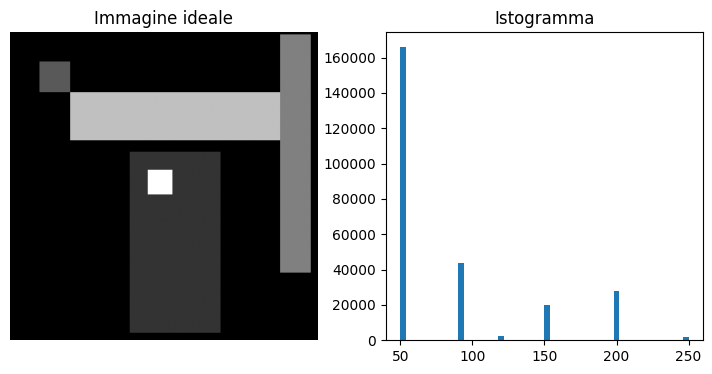

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

ax[0].imshow(image, cmap="gray")
ax[0].set_title("Immagine ideale")
ax[0].axis("off")

ax[1].hist(image.ravel(), bins=50)
ax[1].set_title("Istogramma")

plt.show()

Effetto PVE

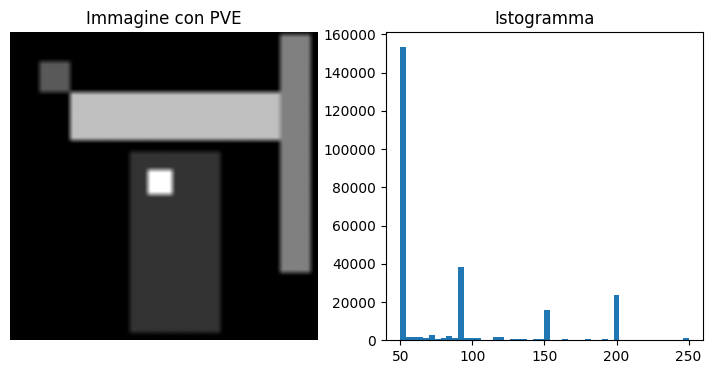

In [4]:
# filtro convolutivo gaussiano per simulare l'effetto PVE
ksize = 11
sigma = 5

g1d = gaussian(ksize, sigma)
h = np.outer(g1d, g1d)
h /= h.sum()

image_pve = convolve(image, h, mode="reflect")

# visualizzazione
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

ax[0].imshow(image_pve, cmap="gray")
ax[0].set_title("Immagine con PVE")
ax[0].axis("off")

ax[1].hist(image_pve.ravel(), bins=50)
ax[1].set_title("Istogramma")

plt.show()

Effetto attenuazione (campo parabolico)

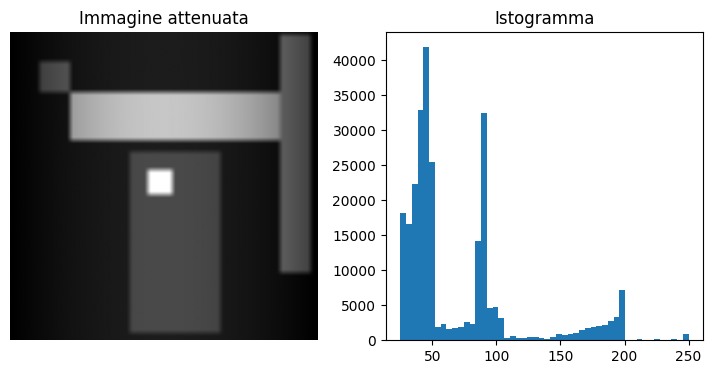

In [5]:
# simulazione dell'effetto di attenuazione
x, y = np.meshgrid(np.arange(dim), np.arange(dim))
xc = dim / 2
yc = dim / 2

sigma_att = dim / 2
attenuation_field = 1 - ((x - xc)**2) / (2 * sigma_att**2)
attenuation_field = np.maximum(attenuation_field, 0)

image_att = image_pve * attenuation_field

# visualizzazione
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

ax[0].imshow(image_att, cmap="gray")
ax[0].set_title("Immagine attenuata")
ax[0].axis("off")

ax[1].hist(image_att.ravel(), bins=50)
ax[1].set_title("Istogramma")

plt.show()


Rumore additivo Gaussiano

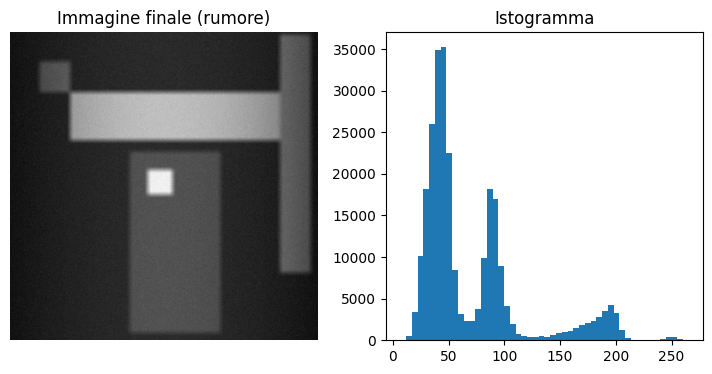

In [6]:
# simulazione del rumore
np.random.seed(0)  # riproducibilità (opzionale)
image_final = image_att + 5 * np.random.randn(dim, dim)

# visualizzazione
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

ax[0].imshow(image_final, cmap="gray")
ax[0].set_title("Immagine finale (rumore)")
ax[0].axis("off")

ax[1].hist(image_final.ravel(), bins=50)
ax[1].set_title("Istogramma")

plt.show()


Immagine differenza

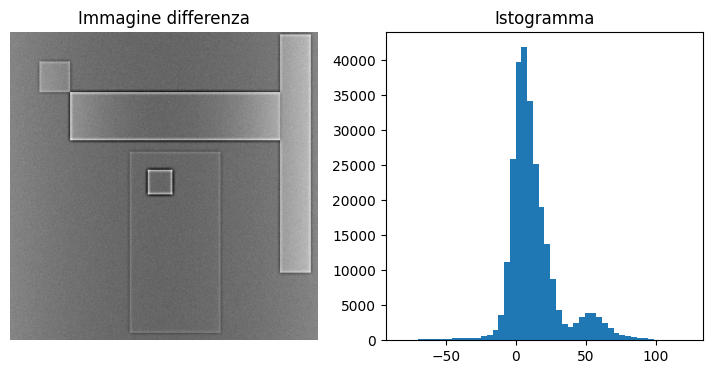

In [7]:
dif = image - image_final

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

ax[0].imshow(dif, cmap="gray")
ax[0].set_title("Immagine differenza")
ax[0].axis("off")

ax[1].hist(dif.ravel(), bins=50)
ax[1].set_title("Istogramma")

plt.show()
